# Donor match

In this notebook, we align donors (after running `cellSNP` and `vireo` without any genotype) by their genotypes. Specifically we are aligning the donor genotypes estimated with vireo from the scRNA-seq data with other the genotypes coming from other 'omics data (e.g., SNP array, Exome-seq). The idea is that we align the donors with giving least genotype difference, either using categorical genotype value or genotype probability.

To do so 

1. First run cellSNP to genotype the barcodes in the scRNA-seq libaries and make a .vcf file with the varians in their reads (CellGen can do this for you, is computational expensive):

```
cellSNP -s sample.bam -b sample.barcodes.tsv -o out.sample.cellsnp -R /lustre/scratch126/cellgen/cellgeni/tickets/tic-1939/genome1K.phase3.SNP_AF5e2.chr1toX.hg38.vcf.gz -p 6 --minMAF 0.1 --minCOUNT 20
```

> Find `genome1K.phase3.SNP_AF5e2.chr1toX.hg38.vcf.gz` here https://sourceforge.net/projects/cellsnp/files/SNPlist/

2. Next run vireo without any genotype. This uses the SNPs in the previous step to classify scRNA-seq barcodes and the variants into `N` donors, and generate a .vcf with the variants of each donor:

```
vireo -c sample/cellSNP-out/ -N 2 -o out/sample/ -t GT
```

3. Use the code below (vire's donor_match notebook) will link the donor's genotype from step 2 (i.e. donors and genotypes estimated from scRNA-seq) with the genotypes provided from SNP array/Exome-seq data.

> IMPORTANT: the .vcf file from SNP array/Exome-seq data should only contain SNPs. Missing values (./.) should be removed. 
You can use `bcftools  view -g ^miss in.vcf > out.vcf` to filter missing values. Also, it is recommended that both .vcfs have the same N of samples. Use bcftools to generate/filter pairs of donors if N=2


In [1]:
from os.path import exists
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vireoSNP
print("vireoSNP version: %s" %vireoSNP.__version__)


def getdataframe(res, library_id):
    # What to make the function do
    
    df = pd.DataFrame(res['matched_GPb_diff'],
                 index=res['matched_donors1'],
                 columns=res['matched_donors2'])
    df['Patient'] = df.index
    df['library'] = library_id
    results = pd.melt(df, id_vars = ['Patient', 'library'])
    return results


def match_donors(scRNAseq_libraries, genotype_vcf):
    for library_id in scRNAseq_libraries:
#         print(library_id)


        # Link donors
        res = vireoSNP.vcf.match_VCF_samples('/home/jovyan/vireo/out_novcf/'+library_id+'/GT_donors.vireo.vcf.gz', 
                                              genotype_vcf,
                                             GT_tag1 = 'GT', GT_tag2='GT')


        # Save data frame
        results = getdataframe(res, library_id)
        results.to_csv('~/vireo/donor_assignements/'+library_id+'_donor_assignement.csv')


        # Plot
        fig = plt.figure()
        vireoSNP.plot.heat_matrix(res['matched_GPb_diff'], 
                                  res['matched_donors1'] , 
                                  res['matched_donors2'] )
        plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
        plt.tight_layout()
        plt.show()

        fig = plt.figure()
        vireoSNP.plot.heat_matrix(res['matched_GPb_diff'] < 0.11, 
                                  res['matched_donors1'] , 
                                  res['matched_donors2'] )
        plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
        plt.tight_layout()
        plt.show()

vireoSNP version: 0.5.8


In [2]:
# # -- these should  *match)
# match_donors(scRNAseq_libraries=['UA_Endo10298211', 'UA_Endo10298210'], 
#              genotype_vcf='/nfs/users/nfs_l/lg18/team292/lg18/endometriosis/data/genotypes/sample_specific/FX1125_FX1176.vcf')
# # -- these should *not match)
# match_donors(scRNAseq_libraries=['UA_Endo10298211', 'UA_Endo10298210'], 
#              genotype_vcf='/nfs/users/nfs_l/lg18/team292/lg18/endometriosis/data/genotypes/sample_specific/FX9009_FX9005.vcf')

In [3]:
# Load libaries genotyped in the main file
meta = pd.read_csv('metadata-libraries.csv',index_col=0)
meta = meta.loc[meta.genotype_file.str.contains('main'),:]
meta = meta.loc[meta.multiplexed.str.contains('yes'),:]

# create a dictionary linking libraries with the genotype.vcf file name
lib2genotype = meta['genotyped'].to_dict()

UA_Endo10298210
Processing ...
FX1125_FX1176.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (152379, 2, 3)
Shape for Geno Prob in VCF2: (152379, 2, 3)
n_variants in VCF1, VCF2 and matched: 152379, 418030, 6227
aligned donors:
['donor0' 'donor1']
['FX1125' 'FX1176']


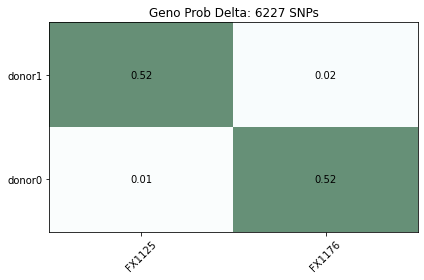

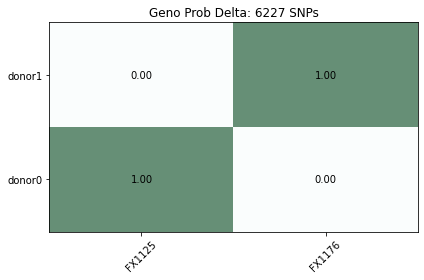

UA_Endo10298211
Processing ...
FX1125_FX1176.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (56980, 2, 3)
Shape for Geno Prob in VCF2: (56980, 2, 3)
n_variants in VCF1, VCF2 and matched: 56980, 418030, 2322
aligned donors:
['donor0' 'donor1']
['FX1125' 'FX1176']


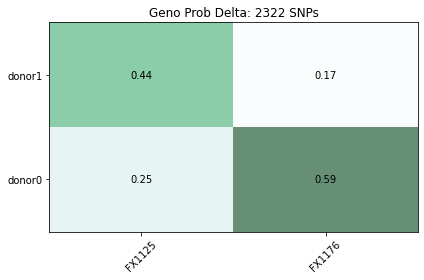

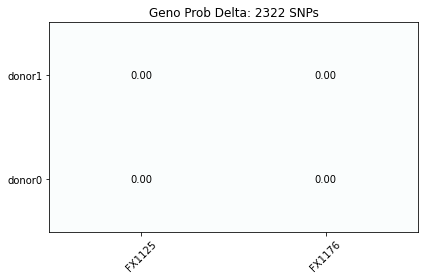

UA_Endo10298212
Processing ...
FX9009_FX1156.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (175535, 2, 3)
Shape for Geno Prob in VCF2: (175535, 2, 3)
n_variants in VCF1, VCF2 and matched: 175535, 420526, 6896
aligned donors:
['donor0' 'donor1']
['FX1156' 'FX9009']


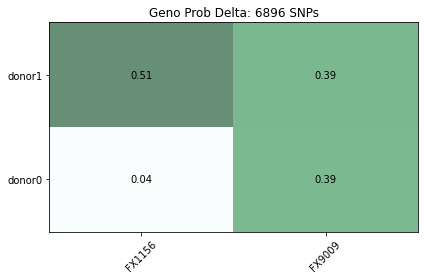

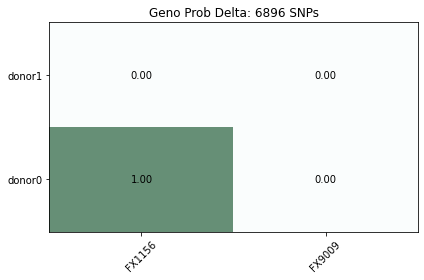

UA_Endo10298213
Processing ...
FX9009_FX1156.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (88389, 2, 3)
Shape for Geno Prob in VCF2: (88389, 2, 3)
n_variants in VCF1, VCF2 and matched: 88389, 420526, 3723
aligned donors:
['donor0' 'donor1']
['FX9009' 'FX1156']


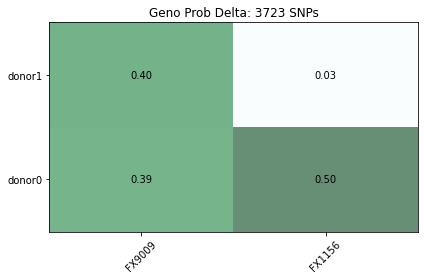

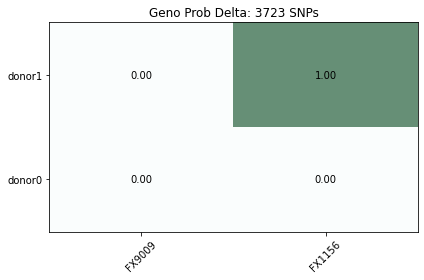

UA_Endo11173480
Processing ...
FX9009_FX1205.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (90112, 2, 3)
Shape for Geno Prob in VCF2: (90112, 2, 3)
n_variants in VCF1, VCF2 and matched: 90112, 419992, 3414
aligned donors:
['donor0' 'donor1']
['FX9009' 'FX1205']


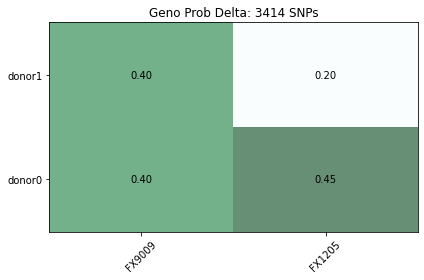

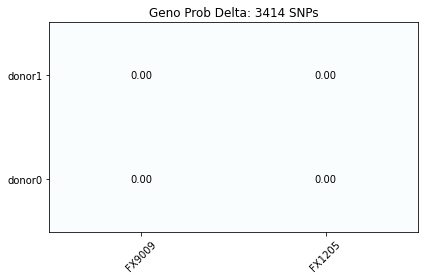

UA_Endo11173481
Processing ...
FX9009_FX1090.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (90206, 2, 3)
Shape for Geno Prob in VCF2: (90206, 2, 3)
n_variants in VCF1, VCF2 and matched: 90206, 420405, 3551
aligned donors:
['donor0' 'donor1']
['FX1090' 'FX9009']


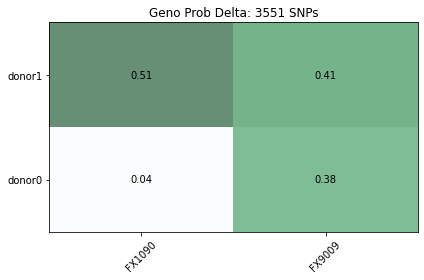

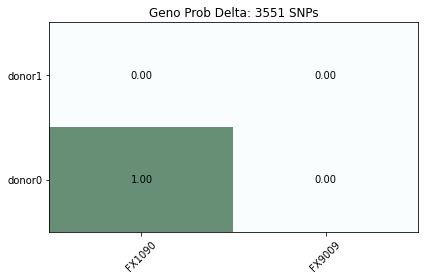

UA_Endo11173482
Processing ...
FX9009_FX1087.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (61444, 2, 3)
Shape for Geno Prob in VCF2: (61444, 2, 3)
n_variants in VCF1, VCF2 and matched: 61444, 420280, 2533
aligned donors:
['donor0' 'donor1']
['FX9009' 'FX1087']


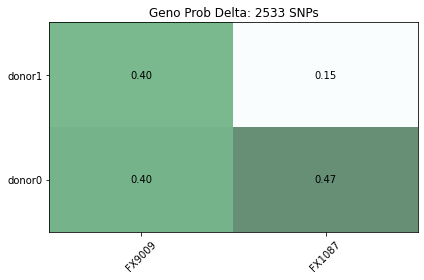

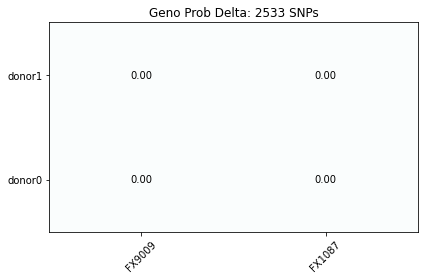

UA_Endo11282193
Processing ...
FX9009_FX1146.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (114320, 2, 3)
Shape for Geno Prob in VCF2: (114320, 2, 3)
n_variants in VCF1, VCF2 and matched: 114320, 417904, 4315
aligned donors:
['donor0' 'donor1']
['FX9009' 'FX1146']


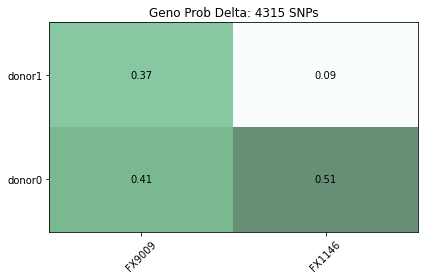

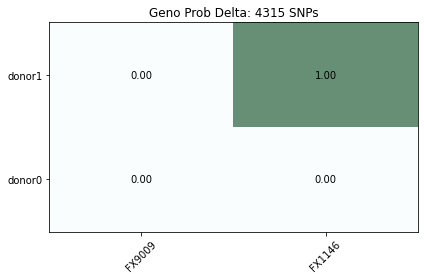

UA_Endo11460960
Processing ...
FX1100_EX0366.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (201886, 2, 3)
Shape for Geno Prob in VCF2: (201886, 2, 3)
n_variants in VCF1, VCF2 and matched: 201886, 168368, 1826
aligned donors:
['donor0' 'donor1']
['FX1100' 'EX0366']


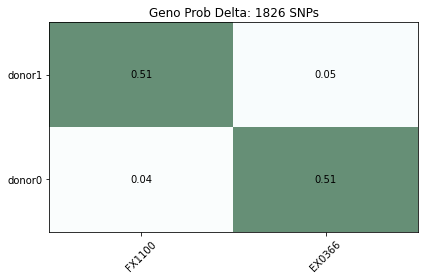

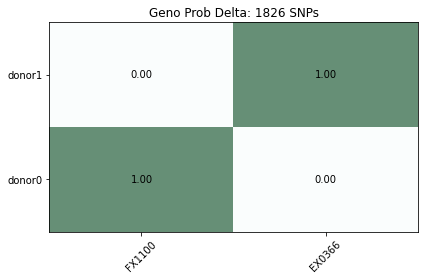

UA_Endo11460961
Processing ...
FX9009_FX1097.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (196603, 2, 3)
Shape for Geno Prob in VCF2: (196603, 2, 3)
n_variants in VCF1, VCF2 and matched: 196603, 420347, 7468
aligned donors:
['donor0' 'donor1']
['FX9009' 'FX1097']


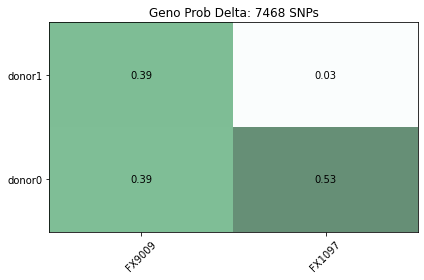

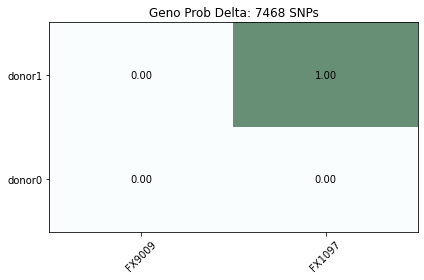

UA_Endo11460962
Processing ...
FX1141_FX1170.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (140101, 2, 3)
Shape for Geno Prob in VCF2: (140101, 2, 3)
n_variants in VCF1, VCF2 and matched: 140101, 420208, 5338
aligned donors:
['donor0' 'donor1']
['FX1141' 'FX1170']


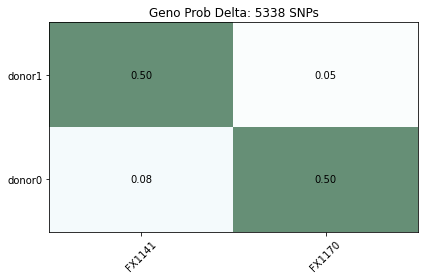

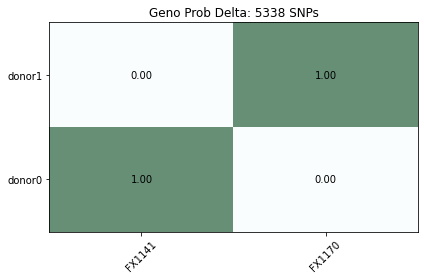

UA_Endo11460963
Processing ...
FX9009_FX1215.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (185896, 2, 3)
Shape for Geno Prob in VCF2: (185896, 2, 3)
n_variants in VCF1, VCF2 and matched: 185896, 419750, 6600
aligned donors:
['donor0' 'donor1']
['FX1215' 'FX9009']


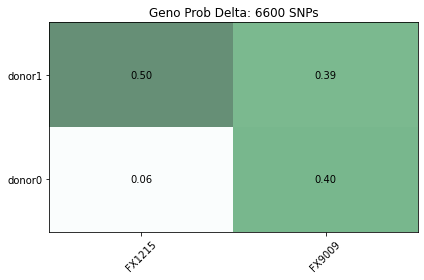

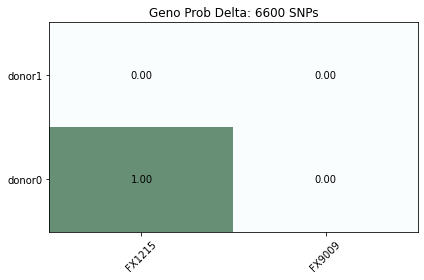

UA_Endo11596522
Processing ...
FX9009_FX9005.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (172938, 2, 3)
Shape for Geno Prob in VCF2: (172938, 2, 3)
n_variants in VCF1, VCF2 and matched: 172938, 420545, 6717
aligned donors:
['donor0' 'donor1']
['FX9005' 'FX9009']


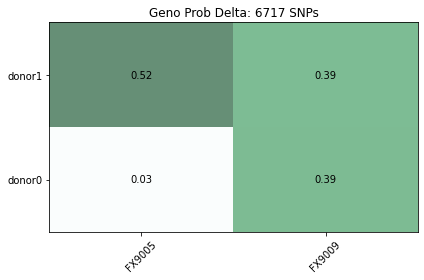

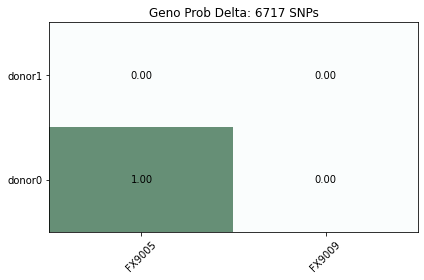

UA_Endo12061415
Processing ...
FX9009_FX1158.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (109520, 2, 3)
Shape for Geno Prob in VCF2: (109520, 2, 3)
n_variants in VCF1, VCF2 and matched: 109520, 420349, 3667
aligned donors:
['donor0' 'donor1']
['FX1158' 'FX9009']


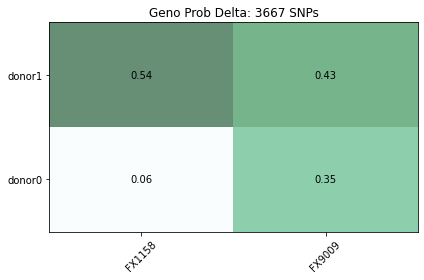

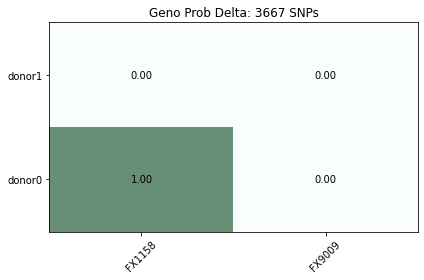

UA_Endo12061703
Processing ...
FX9009_FX0056.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (155410, 2, 3)
Shape for Geno Prob in VCF2: (155410, 2, 3)
n_variants in VCF1, VCF2 and matched: 155410, 420377, 5795
aligned donors:
['donor0' 'donor1']
['FX9009' 'FX0056']


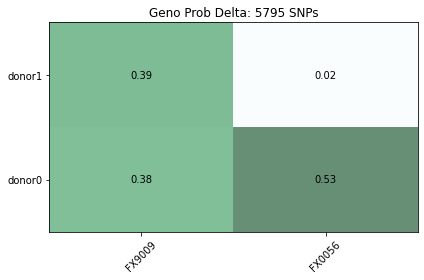

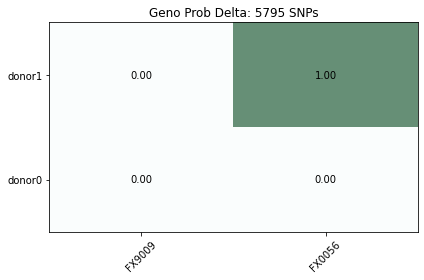

UA_Endo12061704
Processing ...
FX9009_FX1163.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (253723, 2, 3)
Shape for Geno Prob in VCF2: (253723, 2, 3)
n_variants in VCF1, VCF2 and matched: 253723, 420154, 9558
aligned donors:
['donor0' 'donor1']
['FX9009' 'FX1163']


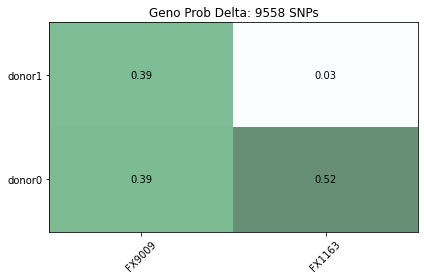

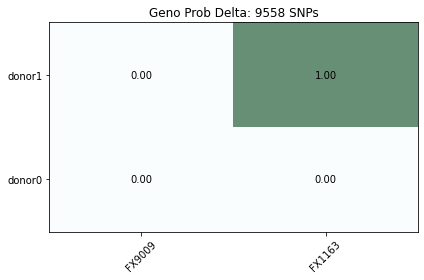

UA_Endo12061705
Processing ...
FX9005_FX9009.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (108097, 2, 3)
Shape for Geno Prob in VCF2: (108097, 2, 3)
n_variants in VCF1, VCF2 and matched: 108097, 420545, 4193
aligned donors:
['donor0' 'donor1']
['FX9009' 'FX9005']


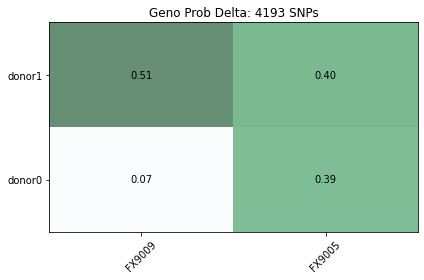

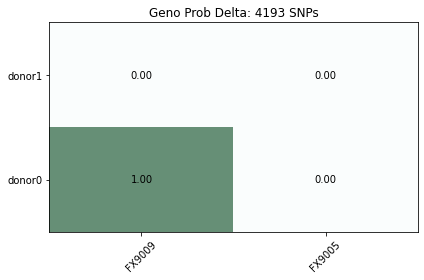

UA_Endo12061706
Processing ...
FX1109_FX1176.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (100534, 2, 3)
Shape for Geno Prob in VCF2: (100534, 2, 3)
n_variants in VCF1, VCF2 and matched: 100534, 417854, 3812
aligned donors:
['donor0' 'donor1']
['FX1176' 'FX1109']


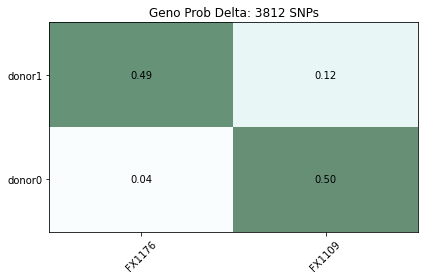

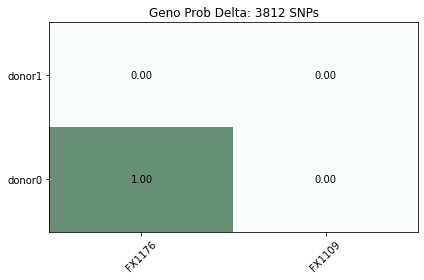

UA_Endo12269810
Processing ...
FX9009_FX1106.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (229423, 2, 3)
Shape for Geno Prob in VCF2: (229423, 2, 3)
n_variants in VCF1, VCF2 and matched: 229423, 420413, 9561
aligned donors:
['donor0' 'donor1']
['FX9009' 'FX1106']


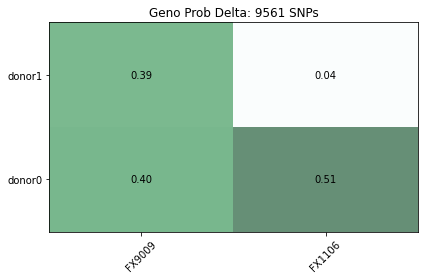

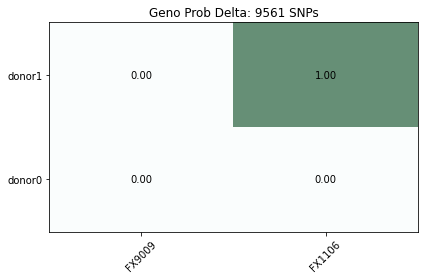

UA_Endo12269811
Processing ...
FX0022_FX0060.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (184208, 2, 3)
Shape for Geno Prob in VCF2: (184208, 2, 3)
n_variants in VCF1, VCF2 and matched: 184208, 670810, 12829
aligned donors:
['donor0' 'donor1']
['FX0022' 'FX0060']


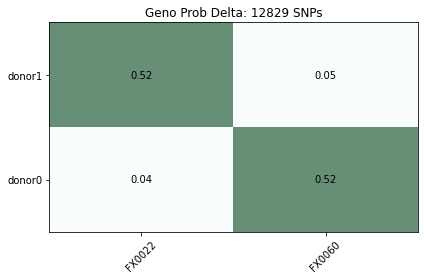

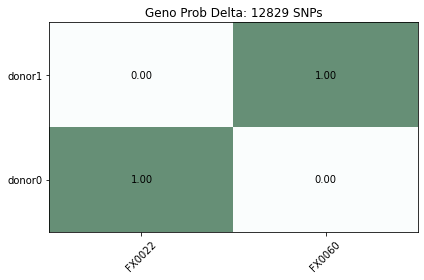

UA_Endo12269813
Processing ...
FX9009_FX1233.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (136332, 2, 3)
Shape for Geno Prob in VCF2: (136332, 2, 3)
n_variants in VCF1, VCF2 and matched: 136332, 420086, 5365
aligned donors:
['donor0' 'donor1']
['FX9009' 'FX1233']


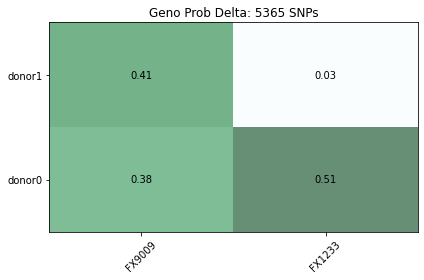

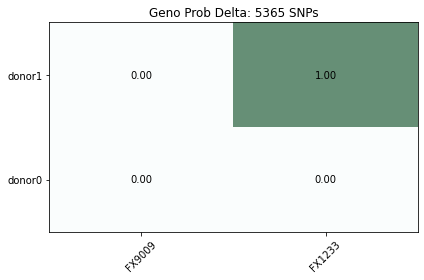

UA_Endo12296823
Processing ...
EX0795_FX1119.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (233188, 2, 3)
Shape for Geno Prob in VCF2: (233188, 2, 3)
n_variants in VCF1, VCF2 and matched: 233188, 47646, 981
aligned donors:
['donor0' 'donor1']
['FX1119' 'EX0795']


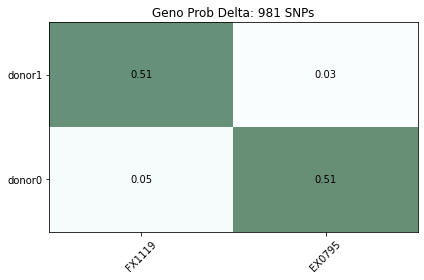

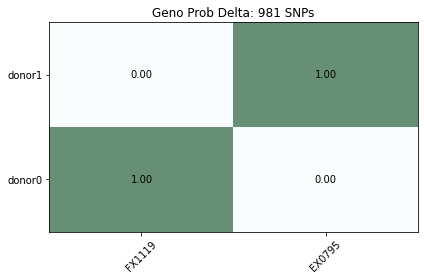

UA_Endo12296824
Processing ...
FX9009_FX1125.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (225571, 2, 3)
Shape for Geno Prob in VCF2: (225571, 2, 3)
n_variants in VCF1, VCF2 and matched: 225571, 420158, 9026
aligned donors:
['donor0' 'donor1']
['FX1125' 'FX9009']


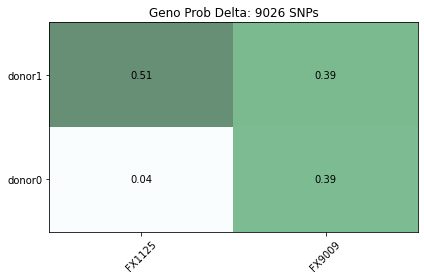

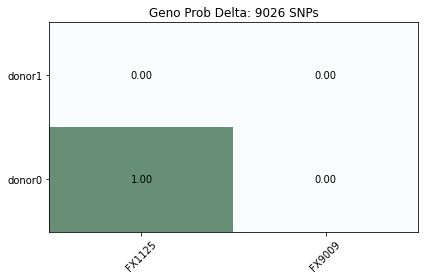

UA_Endo12449298
Processing ...
FX1156_FX1160.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (229816, 2, 3)
Shape for Geno Prob in VCF2: (229816, 2, 3)
n_variants in VCF1, VCF2 and matched: 229816, 419692, 8803
aligned donors:
['donor0' 'donor1']
['FX1160' 'FX1156']


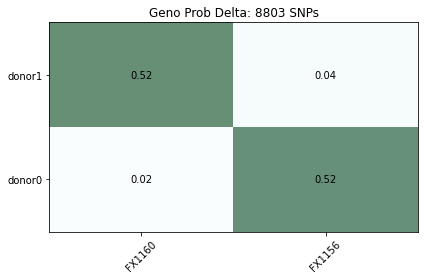

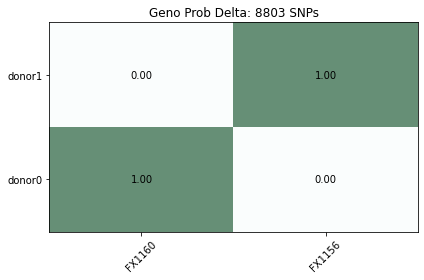

UA_Endo12449299
Processing ...
EX0277_EX0288.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (188099, 2, 3)
Shape for Geno Prob in VCF2: (188099, 2, 3)
n_variants in VCF1, VCF2 and matched: 188099, 502662, 8890
aligned donors:
['donor0' 'donor1']
['EX0288' 'EX0277']


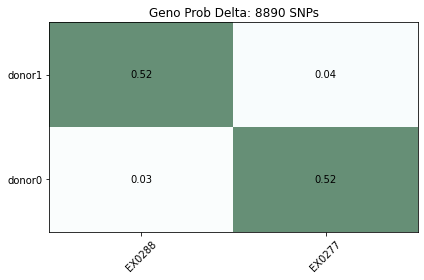

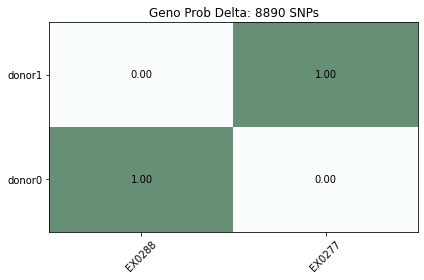

UA_Endo12449300
Processing ...
FX9009_EX0045.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (194198, 2, 3)
Shape for Geno Prob in VCF2: (194198, 2, 3)
n_variants in VCF1, VCF2 and matched: 194198, 168352, 1848
aligned donors:
['donor0' 'donor1']
['EX0045' 'FX9009']


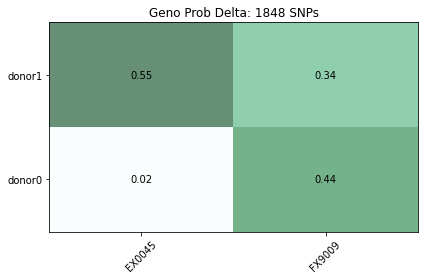

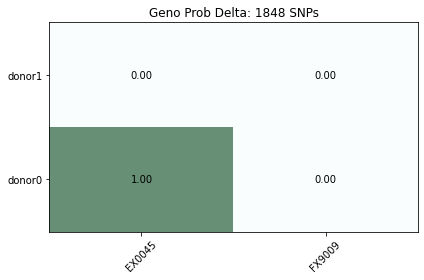

UA_Endo12449301
Processing ...
FX9009_FX1136.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (175439, 2, 3)
Shape for Geno Prob in VCF2: (175439, 2, 3)
n_variants in VCF1, VCF2 and matched: 175439, 420223, 6561
aligned donors:
['donor0' 'donor1']
['FX1136' 'FX9009']


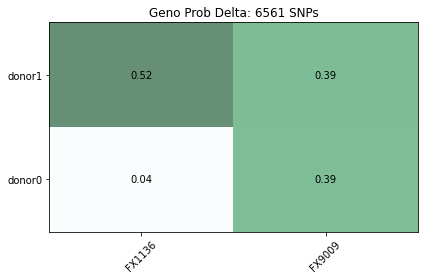

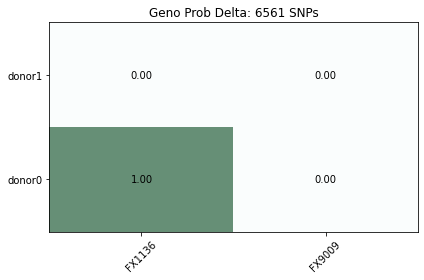

UA_Endo12604667
Processing ...
FX9009_FX0028.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (224555, 2, 3)
Shape for Geno Prob in VCF2: (224555, 2, 3)
n_variants in VCF1, VCF2 and matched: 224555, 47979, 992
aligned donors:
['donor0' 'donor1']
['FX9009' 'FX0028']


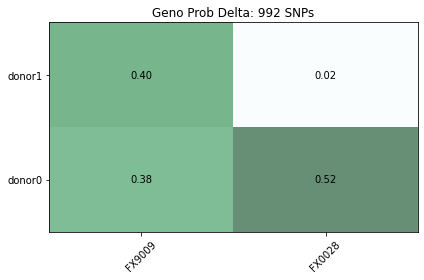

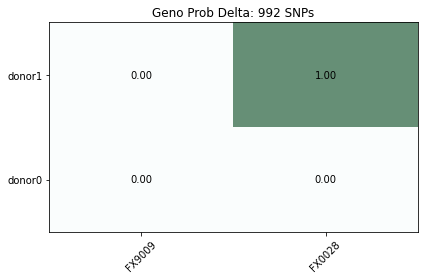

UA_Endo12680031
Processing ...
FX9009_FX1119.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (136483, 2, 3)
Shape for Geno Prob in VCF2: (136483, 2, 3)
n_variants in VCF1, VCF2 and matched: 136483, 420271, 5950
aligned donors:
['donor0' 'donor1']
['FX9009' 'FX1119']


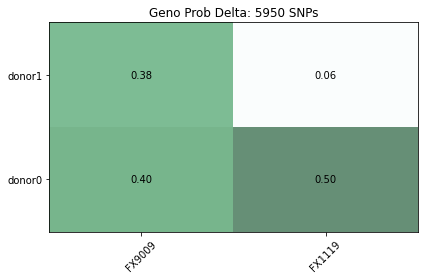

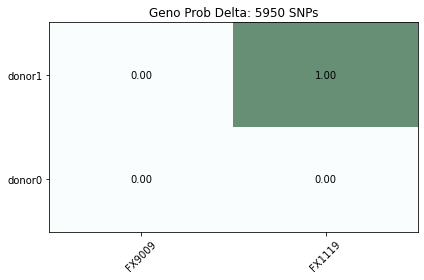

UA_Endo12865960
Processing ...
FX9009_FX1170.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (177077, 2, 3)
Shape for Geno Prob in VCF2: (177077, 2, 3)
n_variants in VCF1, VCF2 and matched: 177077, 420486, 6756
aligned donors:
['donor0' 'donor1']
['FX9009' 'FX1170']


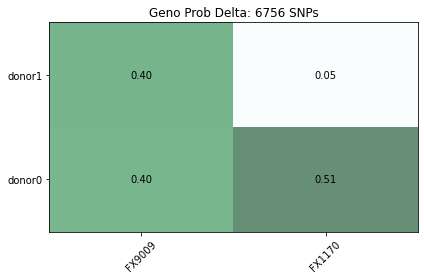

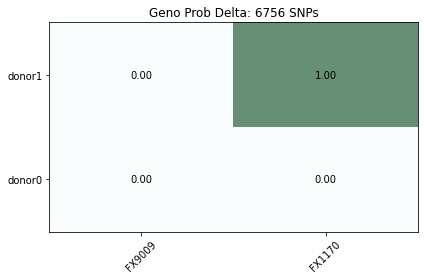

UA_Endo12865963
Processing ...
FX9009_FX1087.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (210160, 2, 3)
Shape for Geno Prob in VCF2: (210160, 2, 3)
n_variants in VCF1, VCF2 and matched: 210160, 420280, 7914
aligned donors:
['donor0' 'donor1']
['FX9009' 'FX1087']


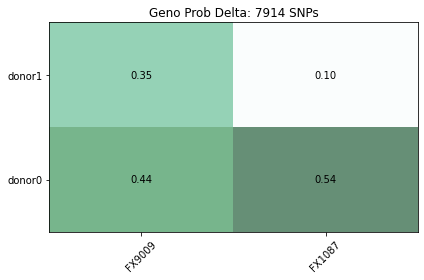

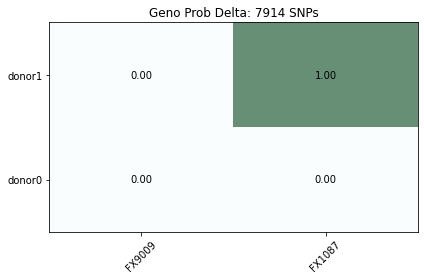

UA_Endo12865964
Processing ...
FX1109_FX1215.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (115765, 2, 3)
Shape for Geno Prob in VCF2: (115765, 2, 3)
n_variants in VCF1, VCF2 and matched: 115765, 419219, 4409
aligned donors:
['donor0' 'donor1']
['FX1109' 'FX1215']


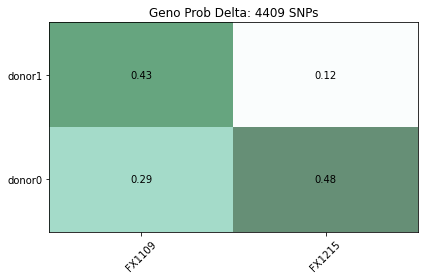

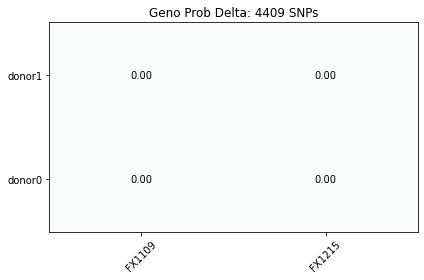

UA_Endo12865965
Processing ...
FX9009_FX1141.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (106449, 2, 3)
Shape for Geno Prob in VCF2: (106449, 2, 3)
n_variants in VCF1, VCF2 and matched: 106449, 420232, 3735
aligned donors:
['donor0' 'donor1']
['FX1141' 'FX9009']


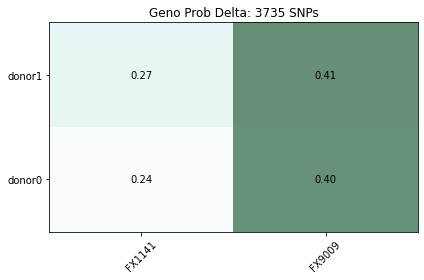

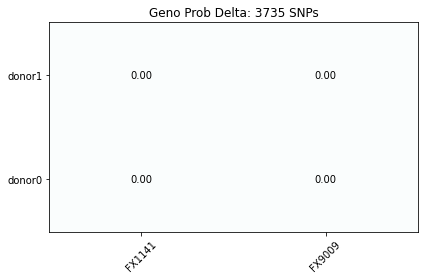

UA_Endo12865966
Processing ...
FX9009_FX1176.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (117337, 2, 3)
Shape for Geno Prob in VCF2: (117337, 2, 3)
n_variants in VCF1, VCF2 and matched: 117337, 418382, 4330
aligned donors:
['donor0' 'donor1']
['FX9009' 'FX1176']


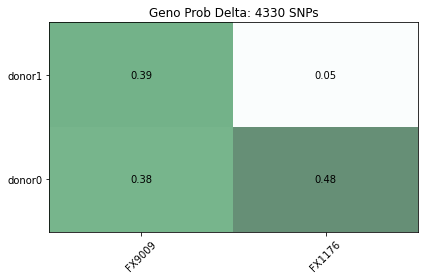

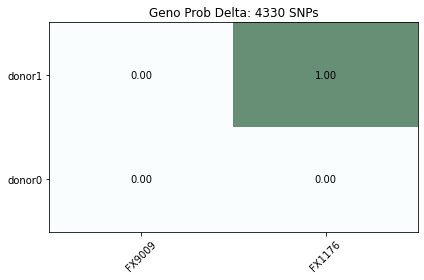

UA_Endo12894973
Processing ...
FX9009_FX1158.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (104869, 2, 3)
Shape for Geno Prob in VCF2: (104869, 2, 3)
n_variants in VCF1, VCF2 and matched: 104869, 420349, 3981
aligned donors:
['donor0' 'donor1']
['FX9009' 'FX1158']


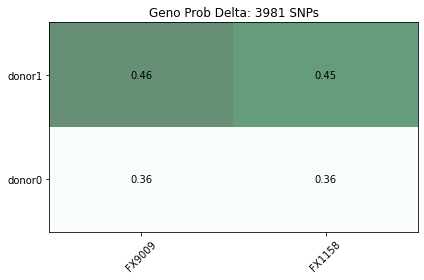

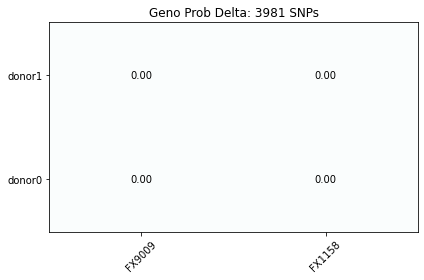

UA_Endo12894974
Processing ...
FX9005_FX9009.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (165819, 2, 3)
Shape for Geno Prob in VCF2: (165819, 2, 3)
n_variants in VCF1, VCF2 and matched: 165819, 420545, 6207
aligned donors:
['donor0' 'donor1']
['FX9009' 'FX9005']


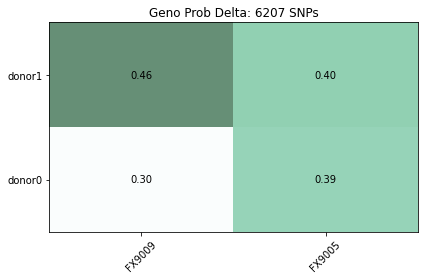

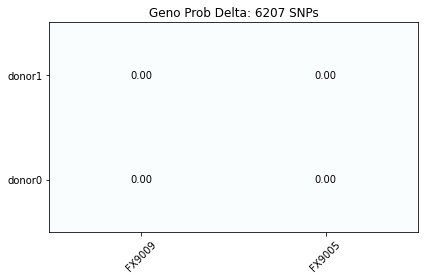

UA_Endo9426401
Processing ...
FX9009_FX1156.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (215967, 2, 3)
Shape for Geno Prob in VCF2: (215967, 2, 3)
n_variants in VCF1, VCF2 and matched: 215967, 420526, 8680
aligned donors:
['donor0' 'donor1']
['FX1156' 'FX9009']


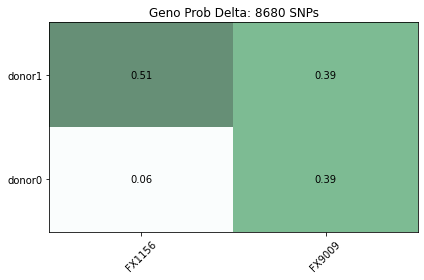

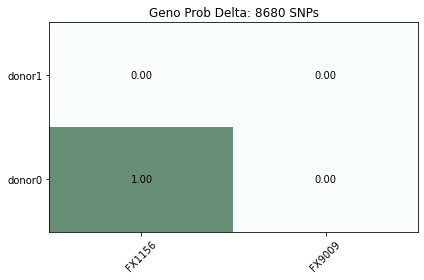

UA_Endo9426402
Processing ...
FX9009_FX1156.vcf
Running vireo match_donors
Shape for Geno Prob in VCF1: (63694, 2, 3)
Shape for Geno Prob in VCF2: (63694, 2, 3)
n_variants in VCF1, VCF2 and matched: 63694, 420526, 2600
aligned donors:
['donor0' 'donor1']
['FX9009' 'FX1156']


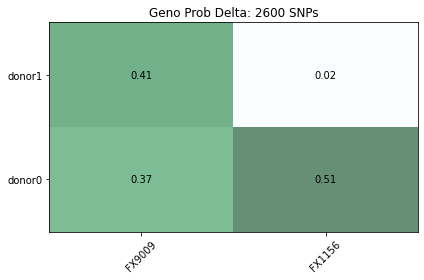

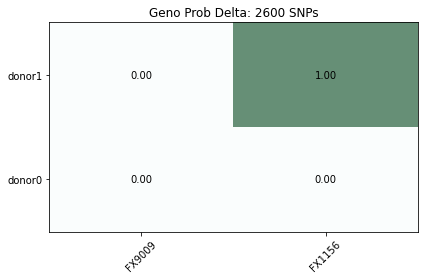

In [10]:
for sc_lib in lib2genotype.keys():
    print(sc_lib)
#     if exists('/home/jovyan/vireo/donor_assignements/'+sc_lib+'_donor_assignement.csv'):
#         print('SKIPPING, already processed\n')
        
#     else: 
    vcf_file_name = lib2genotype[sc_lib]

    # Just format the vcf_file_name
    vcf_file_name = vcf_file_name.replace('; ', '_') if ';' in vcf_file_name else 'FX9009_'+vcf_file_name
    vcf_file_name = 'FX9005_FX9009.vcf' if 'FX9009_FX9009' in vcf_file_name else vcf_file_name+'.vcf'    

    print('Processing ...')
    print(vcf_file_name)
    print('Running vireo match_donors')
    match_donors(scRNAseq_libraries=[sc_lib], 
                 genotype_vcf='/nfs/users/nfs_l/lg18/team292/lg18/endometriosis/data/genotypes/sample_specific_filtered/'+vcf_file_name)

Shape for Geno Prob in VCF1: (106449, 2, 3)
Shape for Geno Prob in VCF2: (106449, 2, 3)
n_variants in VCF1, VCF2 and matched: 106449, 34313, 294
aligned donors:
['donor0' 'donor1']
['FX1141' 'FX9005']


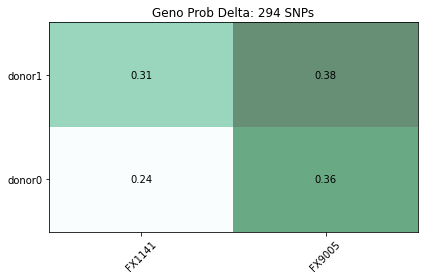

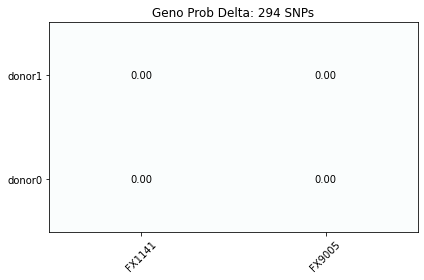

In [7]:
# Problematic sample
match_donors(scRNAseq_libraries=['UA_Endo12865965'], 
             genotype_vcf='/nfs/users/nfs_l/lg18/team292/lg18/endometriosis/data/genotypes/sample_specific_filtered/all_for_nuclei_deconvolution.renamed.fixed.vcf')

Shape for Geno Prob in VCF1: (90112, 2, 3)
Shape for Geno Prob in VCF2: (90112, 2, 3)
n_variants in VCF1, VCF2 and matched: 90112, 34313, 234
aligned donors:
['donor0' 'donor1']
['EX0366' 'FX1205']


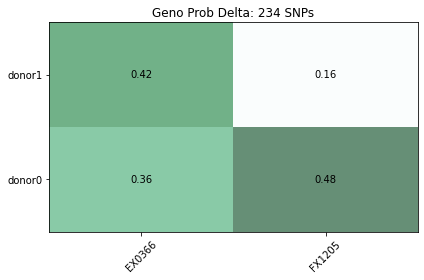

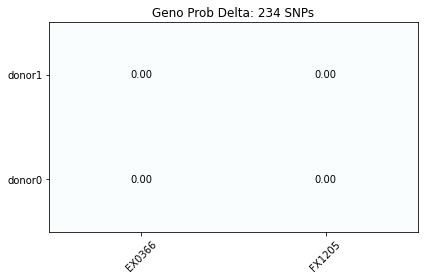

In [8]:
# Problematic sample
match_donors(scRNAseq_libraries=['UA_Endo11173480'], 
             genotype_vcf='/nfs/users/nfs_l/lg18/team292/lg18/endometriosis/data/genotypes/sample_specific_filtered/all_for_nuclei_deconvolution.renamed.fixed.vcf')